In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

In [2]:
data=pd.read_csv("..\\IMDB-Movie-Data.csv")
data=data.dropna(axis=0, how='any')
data.shape

(838, 33)

In [3]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Success'],
      dtype='object')

In [4]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.groupby("Success").size()

Success
0.0    689
1.0    149
dtype: int64

[0.04907314 0.07472763 0.15952939 0.24006048 0.18538585 0.07528906
 0.01623674 0.03562605 0.01164077 0.00933716 0.01497622 0.0117673
 0.03216352 0.00570215 0.00837672 0.0034369  0.00521378 0.00112049
 0.00152867 0.00841687 0.00857171 0.01371007 0.00353949 0.01682156
 0.00423238 0.00351588]


C:\Users\hasibenur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


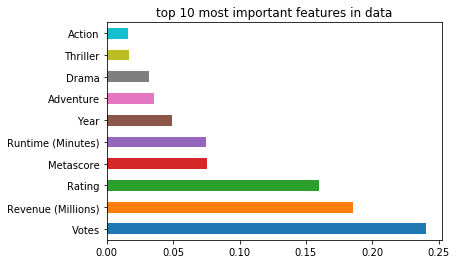

In [6]:
#Data for Evaluation
X =data[data.columns[6:32]] #independent column
Y=data.iloc[:,-1] #target column i.e success

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class 

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("top 10 most important features in data")
plt.show()

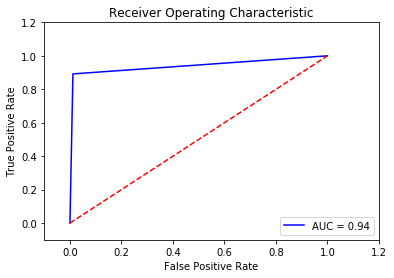

In [7]:
#Train and Test Splitting
x_train,x_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)
scaler = StandardScaler()
X_train =scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

#Model and Training
tree_reg= DecisionTreeRegressor()
tree_reg.fit(X_train, Y_train)
y_pred = tree_reg.predict(X_test)

#Model Evaluation
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [8]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)

Confusion Matrix is :
[[171   2]
 [  4  33]]

Accuracy is :
0.9714285714285714

Precision is :
0.9428571428571428

Recall is: 
0.8918918918918919


In [9]:
print("DC algoritma dogrulugu:", tree_reg.score(X_test,Y_test))

DC algoritma dogrulugu: 0.8031557569129824


### Submission

In [10]:
x_test.head()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
825,2007.0,133.0,7.4,95172.0,24.34,56.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,2016.0,105.0,5.8,30405.0,14.90,34.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,2016.0,102.0,6.0,75137.0,35.54,18.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
810,2012.0,109.0,7.7,192190.0,40.98,68.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
216,2010.0,118.0,5.9,148949.0,88.76,47.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
submission_predictions = tree_reg.predict(X_test)

In [34]:
submission = pd.DataFrame({
        "Year": x_test["Year"],
        "Rating": x_test["Rating"],
        "Votes": x_test["Votes"],
        "Adventure": x_test["Adventure"],
        "Comedy": x_test["Comedy"],
        "Metascore": x_test["Metascore"],
        "Success": submission_predictions
    })

submission.to_csv("success.csv", index=False)
print(submission.shape)

(210, 7)


In [13]:
submission.head()

,Year,Rating,Votes,Sci-Fi,Revenue (Millions),Metascore,Success
825,2007.0,7.4,95172.0,0.0,24.34,56.0,0.0
255,2016.0,5.8,30405.0,0.0,14.90,34.0,0.0
238,2016.0,6.0,75137.0,0.0,35.54,18.0,0.0
810,2012.0,7.7,192190.0,0.0,40.98,68.0,0.0
216,2010.0,5.9,148949.0,0.0,88.76,47.0,0.0


### Tahmin sonucu "Başarılı" olan verilerin analizi:

In [14]:
submission[submission["Success"]==1.0].Year.value_counts()

2012.0    7
2015.0    5
2010.0    4
2011.0    4
2013.0    4
2007.0    3
2014.0    2
2006.0    2
2009.0    2
2016.0    1
2008.0    1
Name: Year, dtype: int64

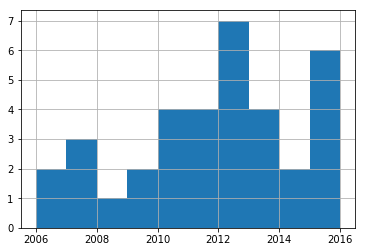

In [15]:
submission[submission["Success"]==1.0].Year.hist()

In [16]:
submission[submission["Success"]==1.0].Rating.value_counts()

8.1    5
7.0    5
7.2    3
7.9    3
8.0    3
6.9    2
7.8    2
7.6    2
7.1    2
7.4    2
7.7    1
8.8    1
8.3    1
6.6    1
8.5    1
7.5    1
Name: Rating, dtype: int64

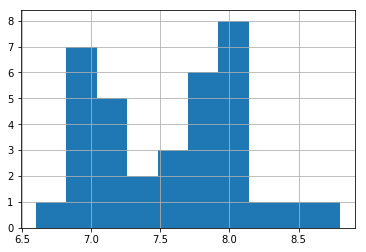

In [17]:
submission[submission["Success"]==1.0].Rating.hist()

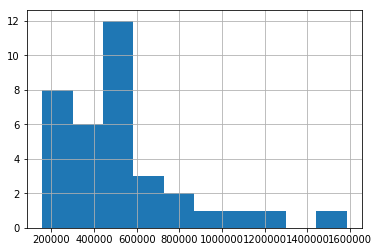

In [18]:
submission[submission["Success"]==1.0].Votes.hist()

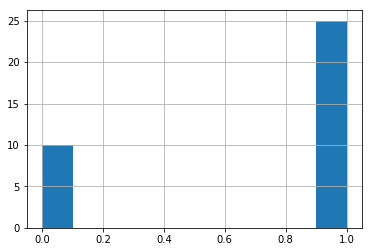

In [33]:
submission[submission["Success"]==1.0]["Adventure"].hist()

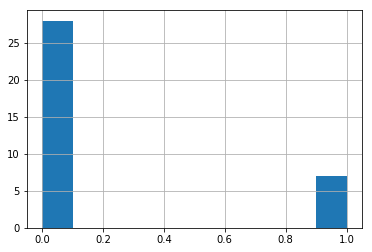

In [35]:
submission[submission["Success"]==1.0]["Comedy"].hist()

### Tahmin sonucu "Başarısız" olan verilerin analizi:

In [21]:
submission[submission["Success"]==0.0].Year.value_counts()

2016.0    48
2015.0    24
2014.0    18
2013.0    15
2011.0    13
2012.0    13
2010.0    10
2006.0     9
2007.0     9
2009.0     8
2008.0     8
Name: Year, dtype: int64

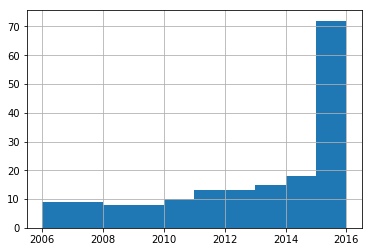

In [22]:
submission[submission["Success"]==0.0].Year.hist()

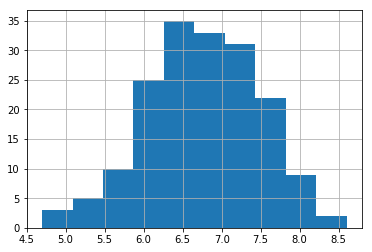

In [23]:
submission[submission["Success"]==0.0].Rating.hist()

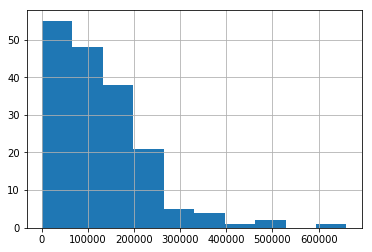

In [25]:
submission[submission["Success"]==0.0].Votes.hist()